In [5]:
import sys
# !{sys.executable} -m pip install qulacs
import joblib
import click
import json
import time
import os
import itertools
import collections.abc
from shutil import copy,SameFileError
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pennylane as qml
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from qiskit_ibm_provider import IBMProvider

from quantum.Quantum import QuantumRegressor
from quantum.Evaluate import evaluate
from settings import ANSATZ_LIST, ENCODER_LIST
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import InconsistentVersionWarning

In [6]:
def circuit(features, parameters):
    #  builds the circuit with the given encoder and variational circuits.
    #  encoder and variational circuits must have only two required parameters, params/feats and wires
    for i in range(re_upload_depth):
        params = parameters.reshape(re_upload_depth,-1)[i]
        
        encoder(features, wires=range(num_qubits))
        variational(params, wires=range(num_qubits))

    return qml.expval(qml.PauliZ(0))


In [7]:
num_qubits=5
re_upload_depth=1
LAYERS=1
# device='qiskit.aer'
# device_backend = FakeCairoV2()
# backend = AerSimulator.from_backend(device_backend)
# device = qml.device(device, wires=num_qubits, backend=backend, shots=shots)


dev='qulacs.simulator'
# device = qml.device(dev, wires=num_qubits, expansion_strategy="device")
# dev="default.qubit"
device = qml.device(dev, wires=num_qubits)


# encoder=ENCODER_LIST['IQP']
# encoder=ENCODER_LIST['M-M-CZ']
# encoder=ENCODER_LIST['A2-A2-CNOT']

# variational=ANSATZ_LIST['HWE-CZ']
# variational=ANSATZ_LIST['Full-CRX']
# variational.set_wires(range(num_qubits))
# variational.layers = LAYERS


# num_params = variational.num_params * re_upload_depth
# generator = np.random.default_rng(12958234)
# initial_parameters = generator.uniform(-np.pi, np.pi, num_params)

# qnode = qml.QNode(circuit, device)

# circuit_specs=qml.specs(qnode)(generator.uniform(-1, 1, num_qubits),initial_parameters)

# print(circuit_specs['resources'])

# qml.draw_mpl(qnode,level=1)(generator.uniform(-1, 1, num_qubits),initial_parameters)
# # plt.savefig('trash.png')
# plt.show()

HWE-CNOT


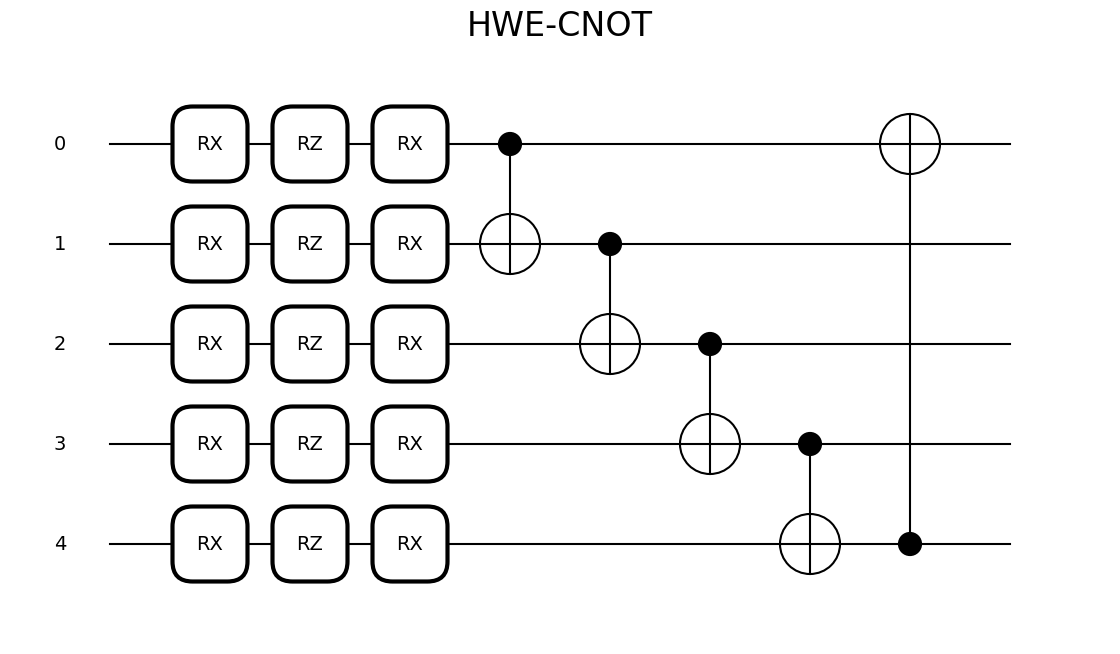

HWE-CZ


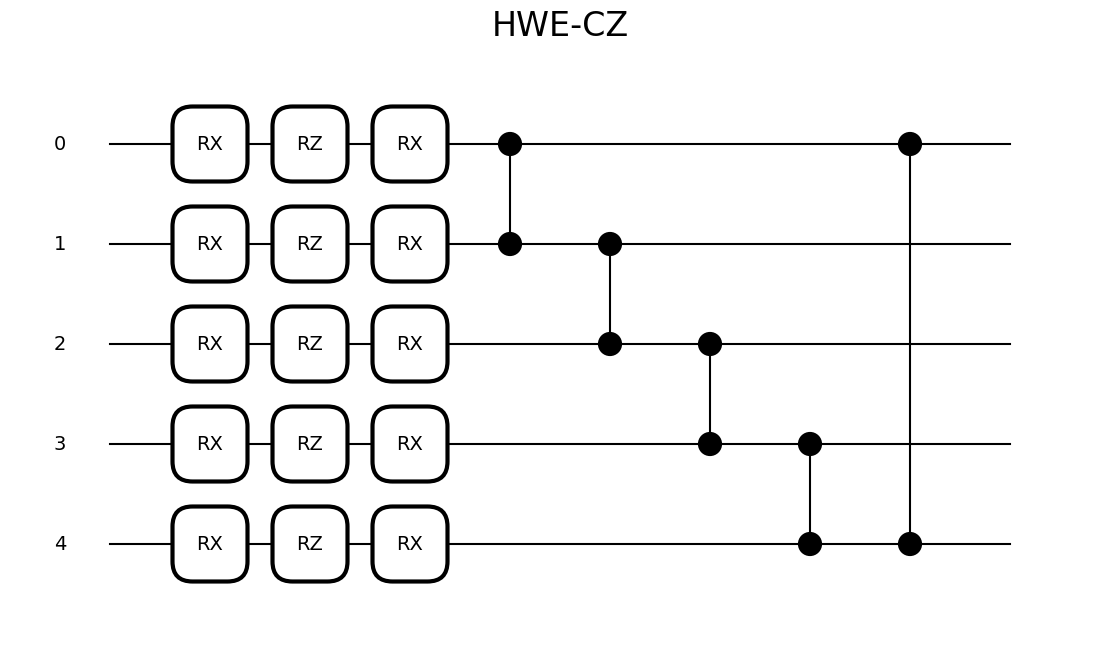

ESU2


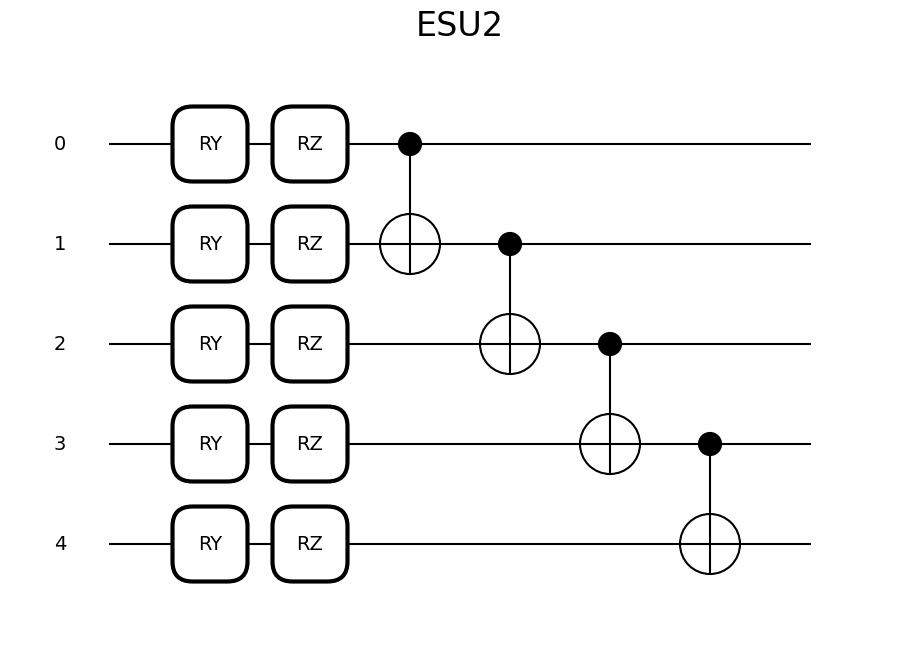

Efficient-CRZ


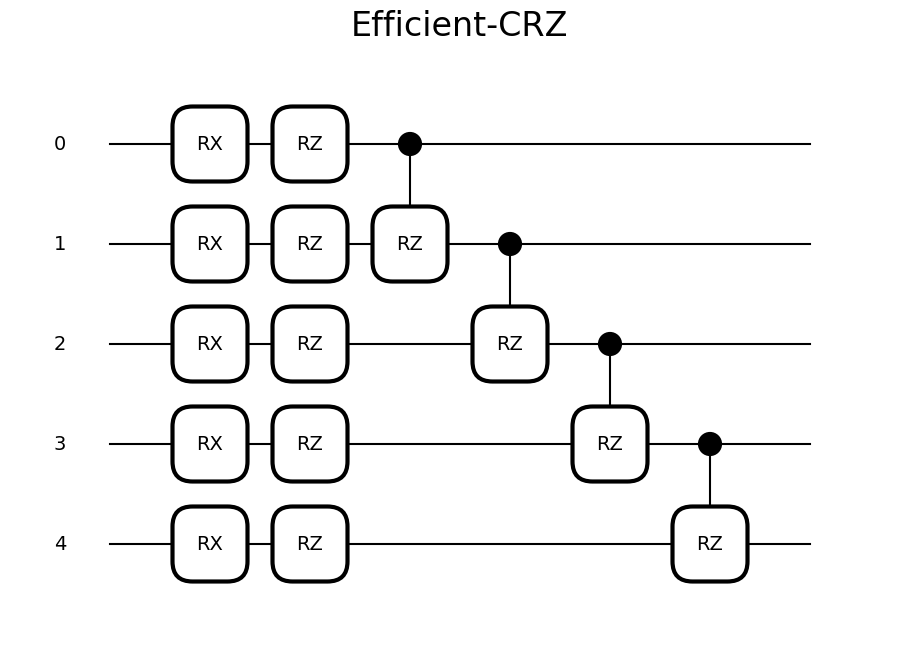

Efficient-CRX


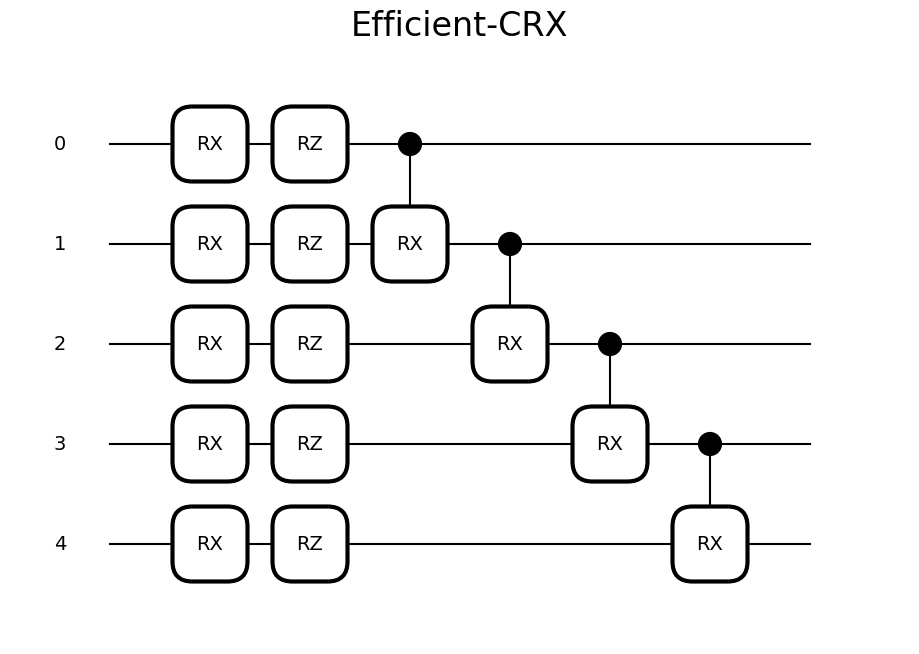

Full-CRZ


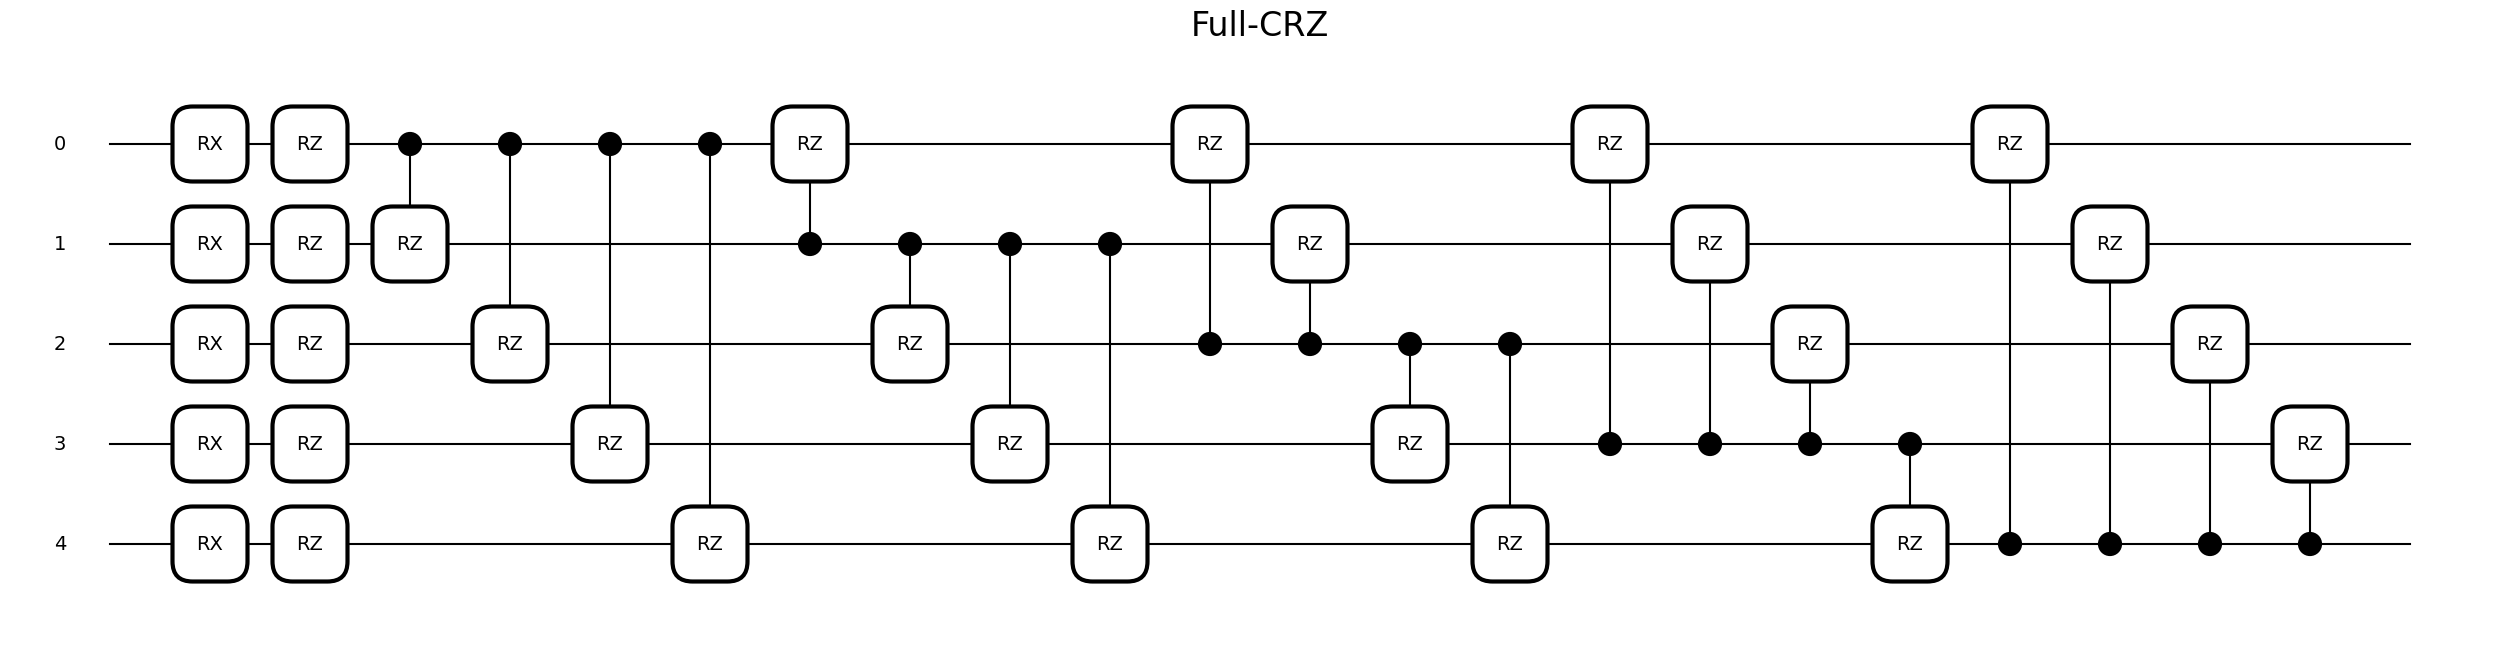

Full-CRX


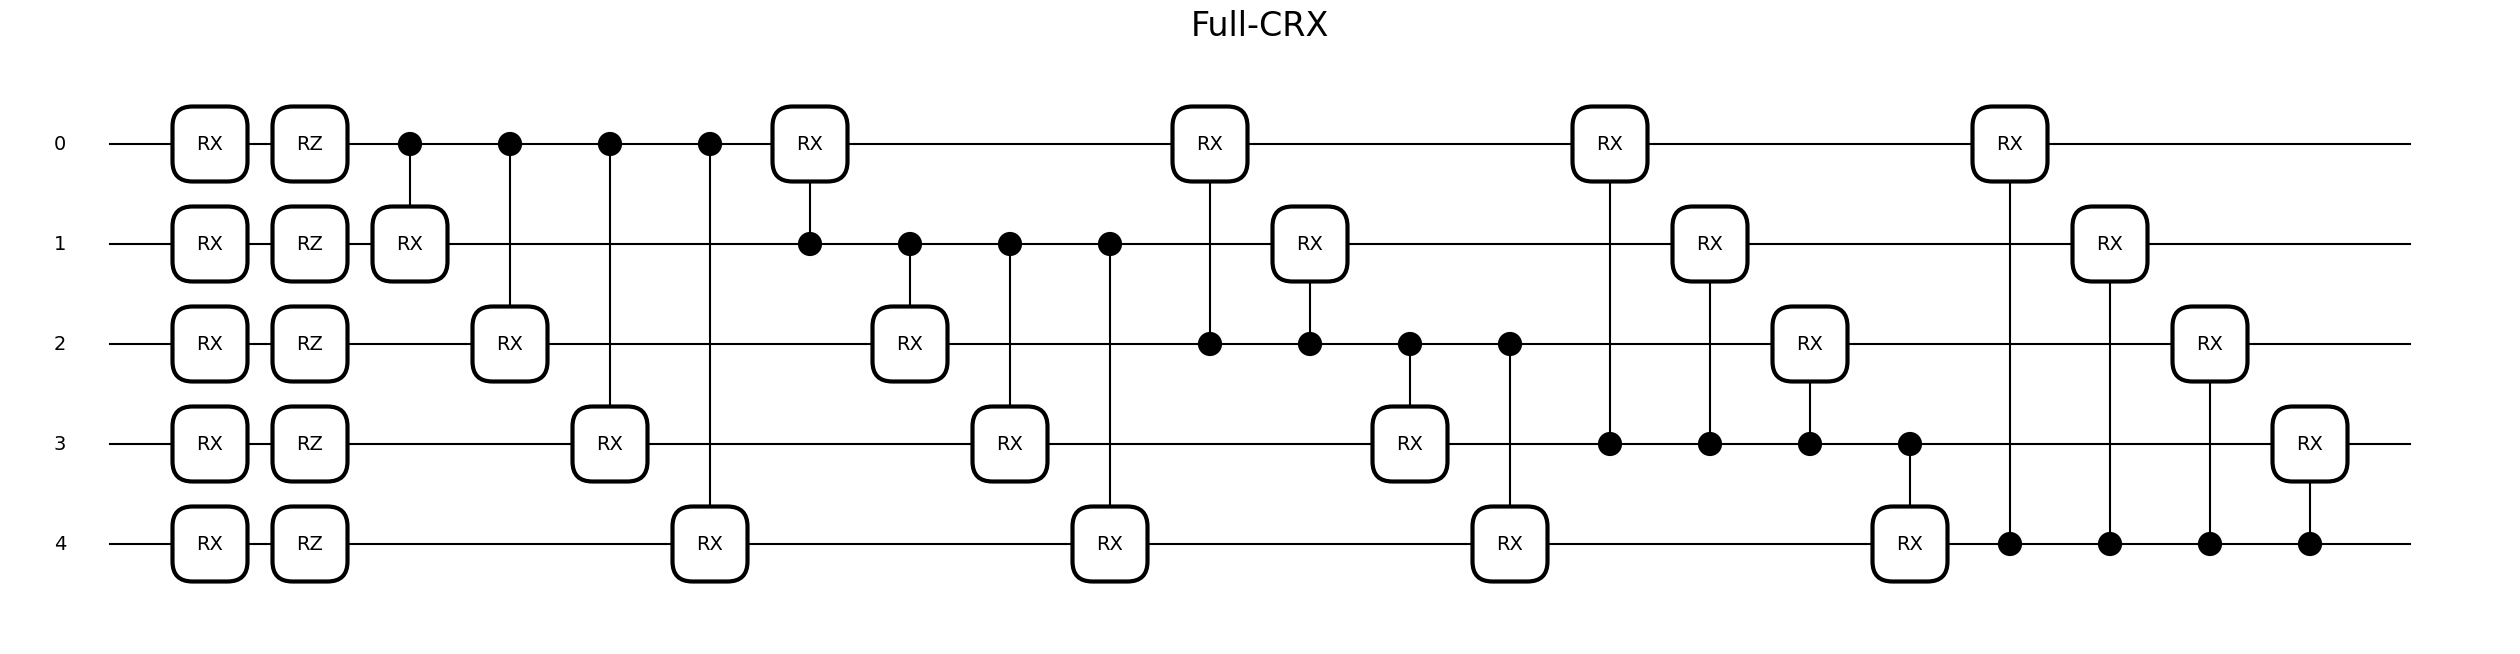

Modified-Pauli-CRZ


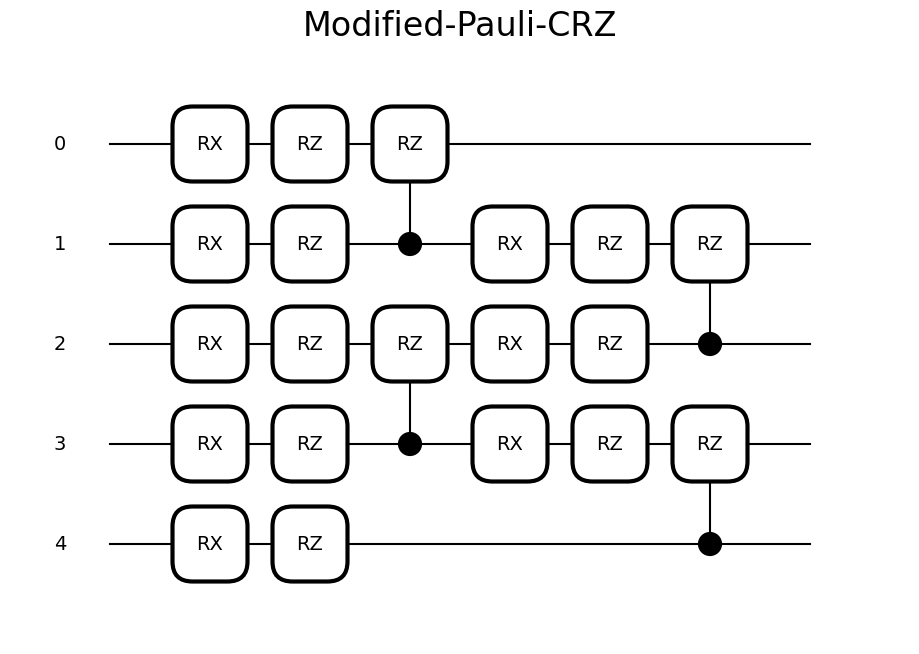

Modified-Pauli-CRX


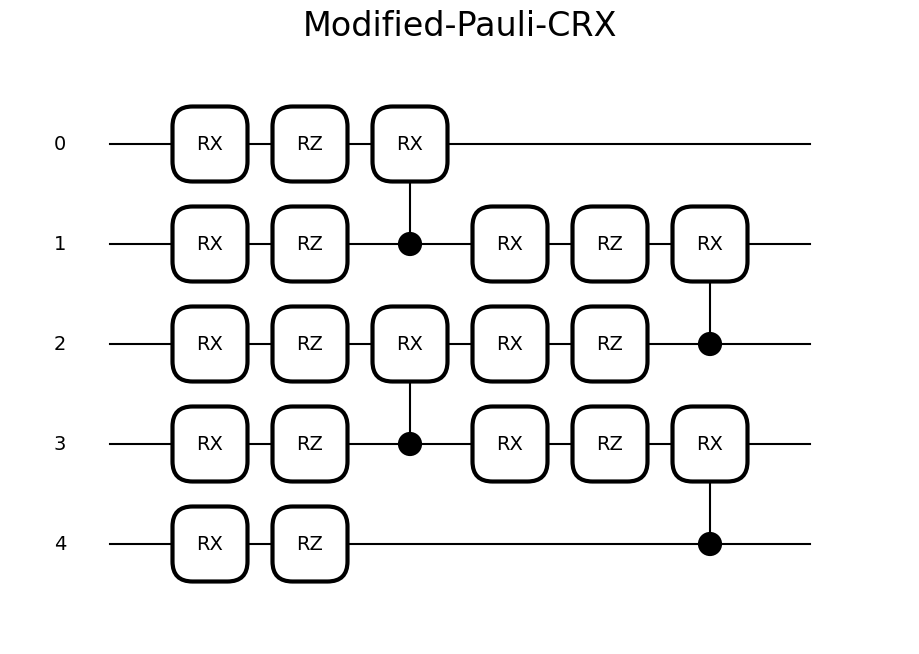

Full-Pauli-CRZ


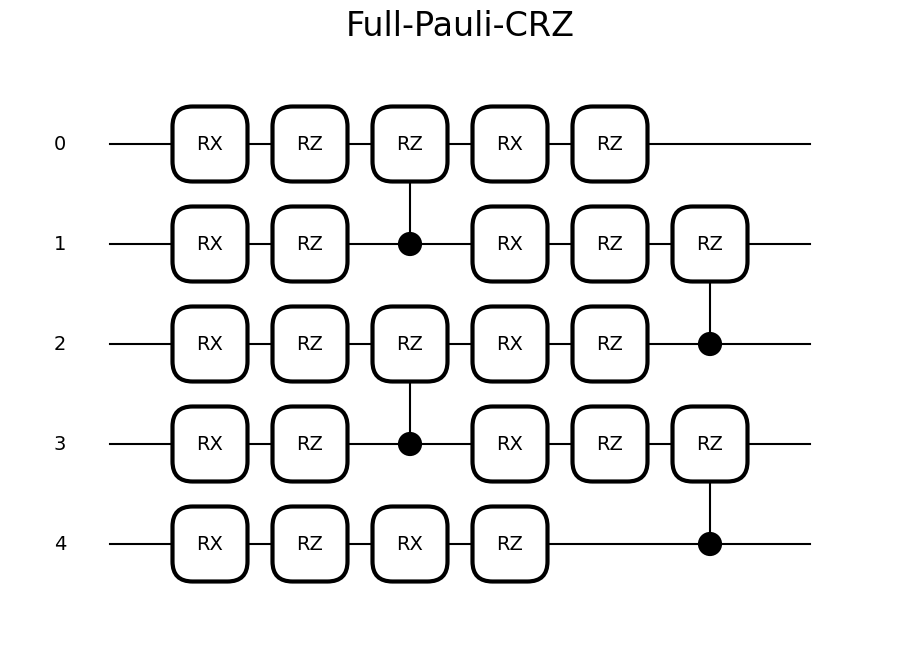

Full-Pauli-CRX


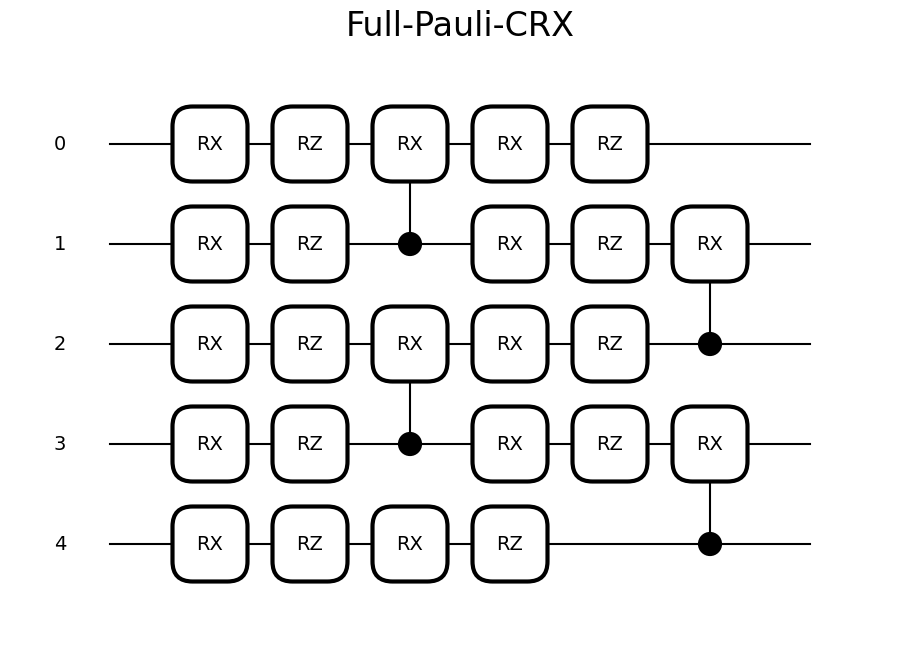

Hadamard


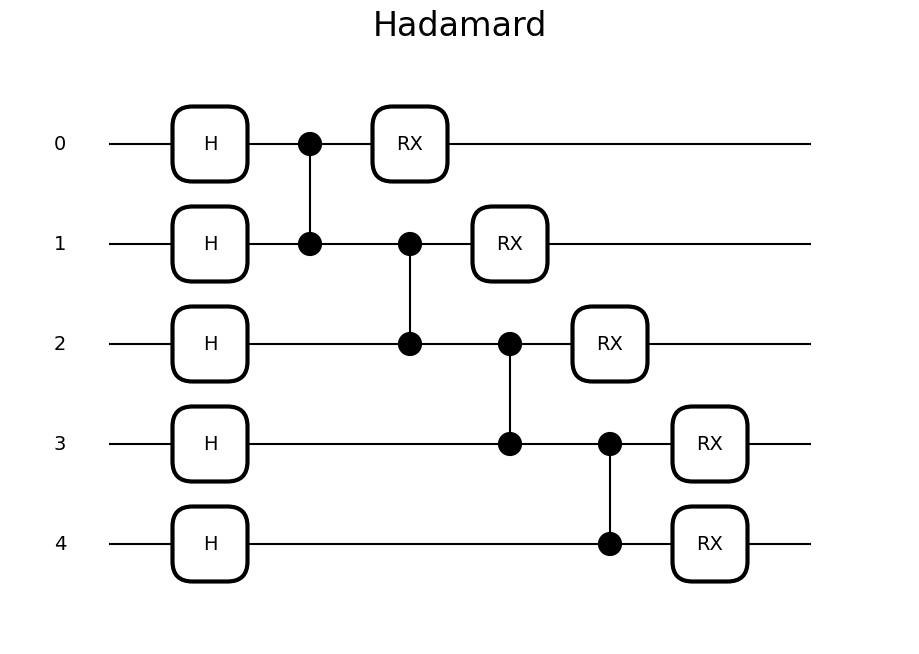

In [10]:
for k,v in ANSATZ_LIST.items():
    # @qml.qnode(device)
    # def circuit(x):
    #     qml.RX(x, wires=0)
    #     return qml.expval(qml.Z(0))

    variational=v
    variational.set_wires(range(num_qubits))
    variational.layers = LAYERS
    num_params = variational.num_params * re_upload_depth
    generator = np.random.default_rng(12958234)
    initial_parameters = generator.uniform(-np.pi, np.pi, num_params)
    draw_var = qml.draw_mpl(qml.QNode(variational,device),level=1)
    print(k)
    draw_var(np.random.rand(variational.num_params))
    plt.title(k,fontsize=24)
    # plt.savefig(os.path.join(os.path.expanduser('~'),'qregress/images/ansatz/',f"5_qubit_ansatz_{k}.png"),dpi=300,bbox_inches='tight')
    plt.show()    
    plt.show()

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


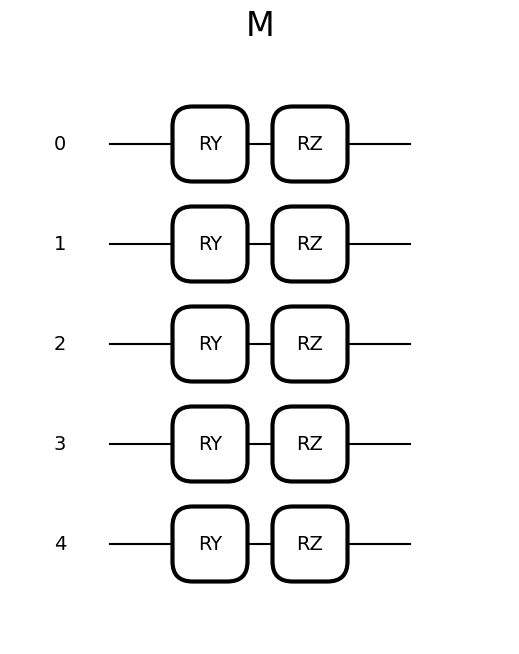

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


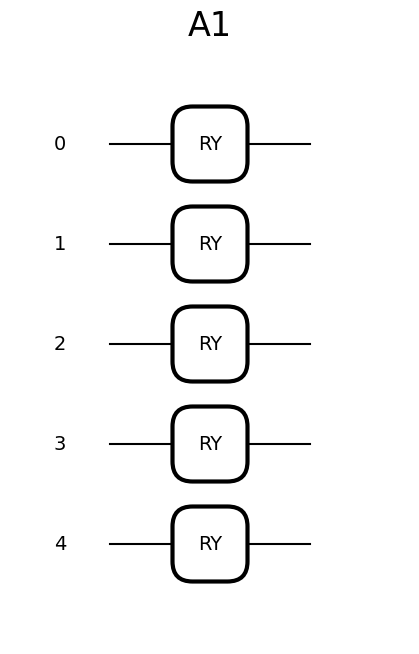

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


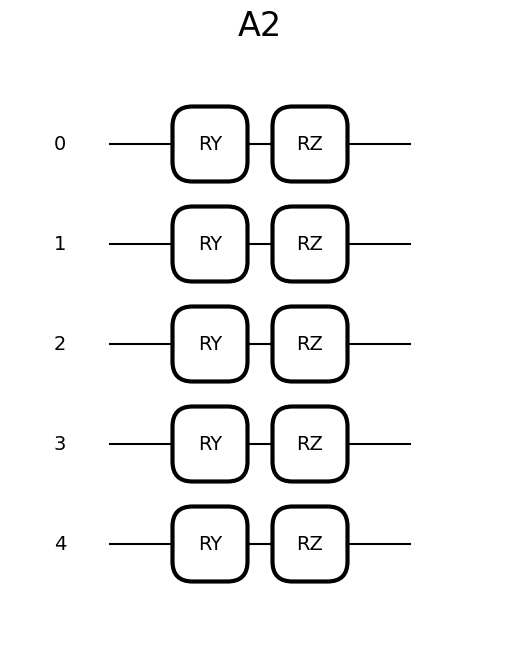

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


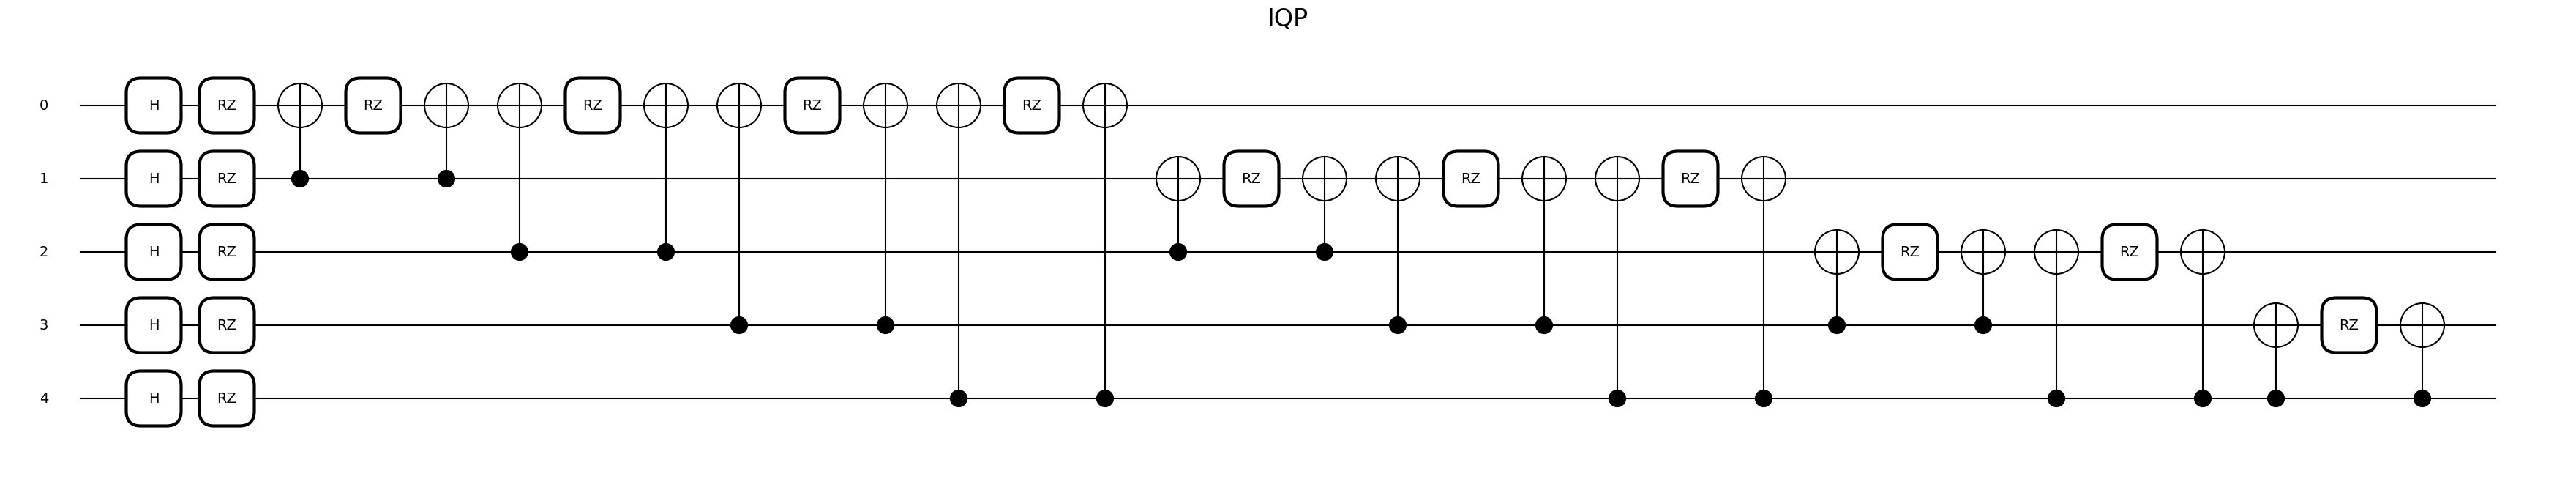

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


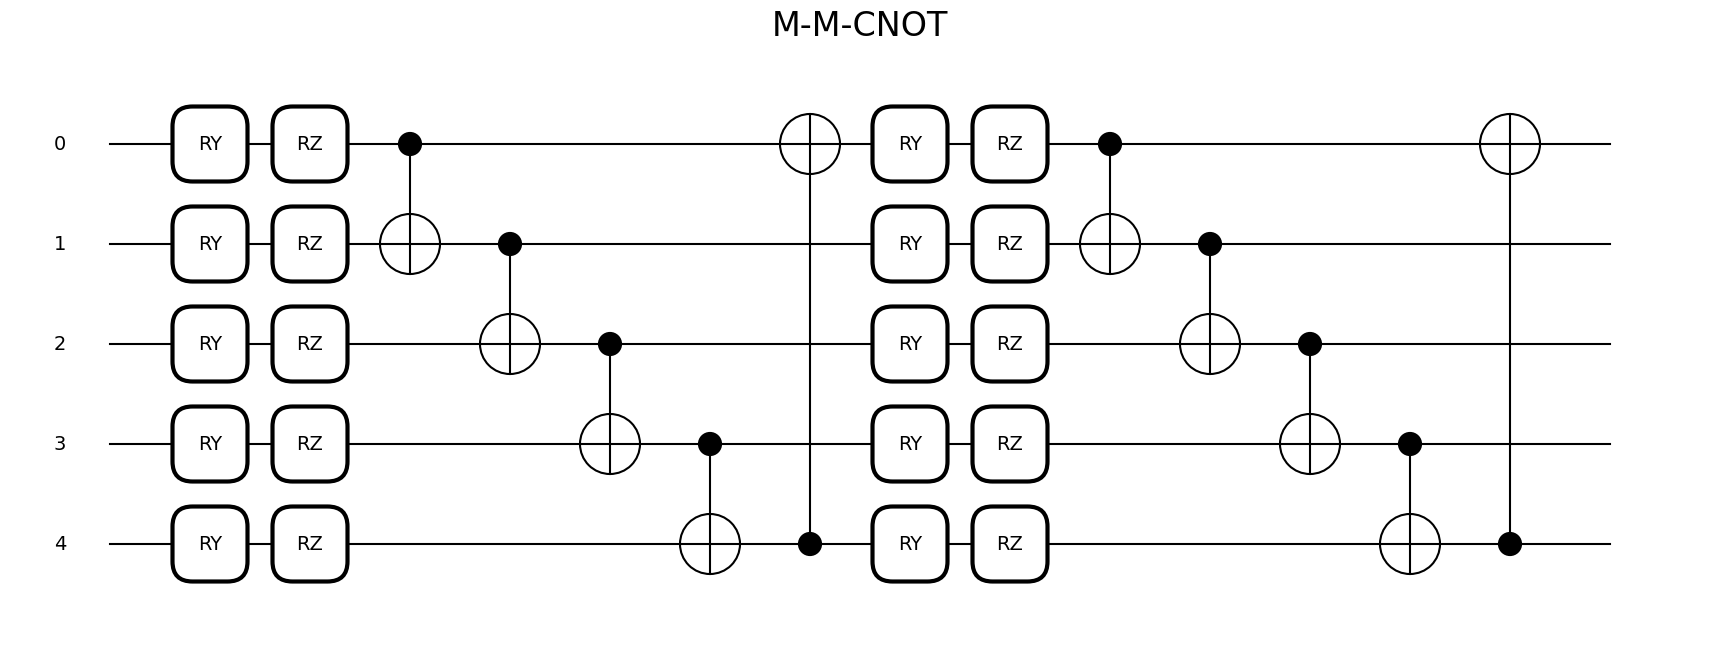

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


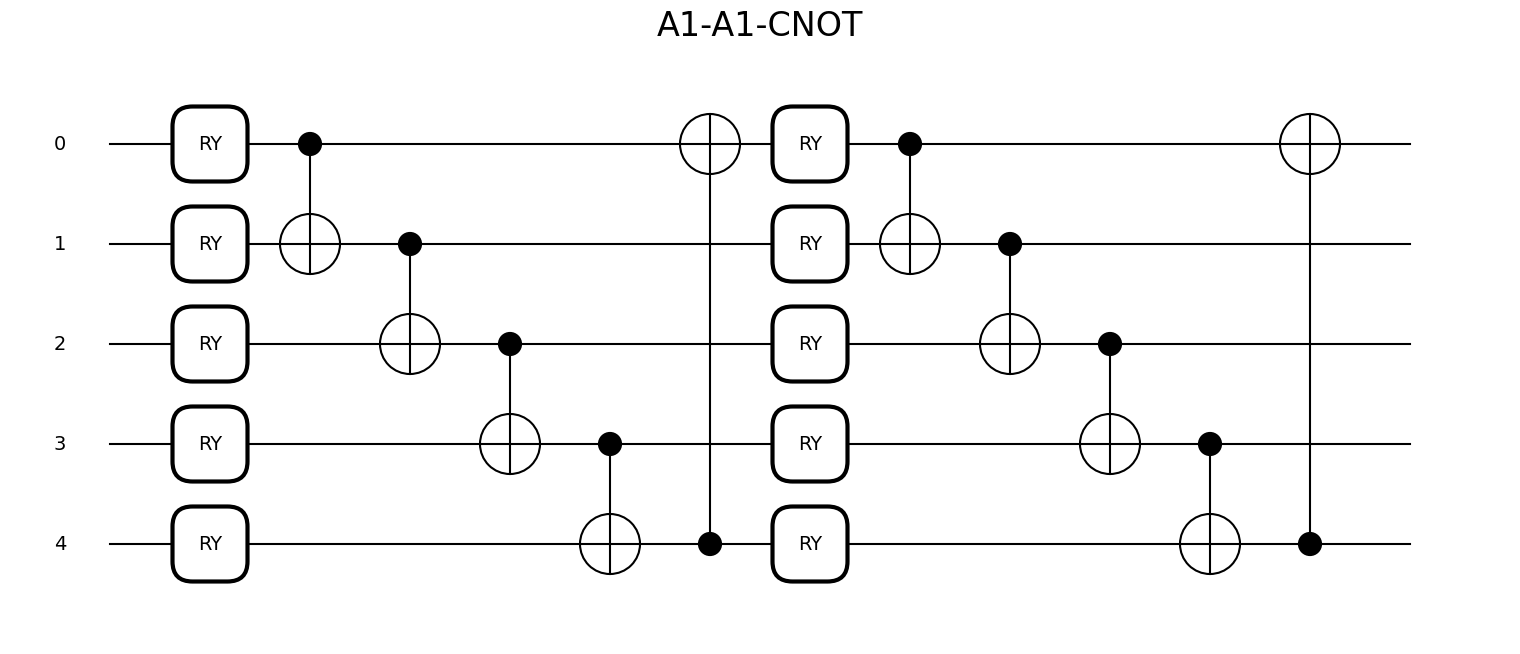

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


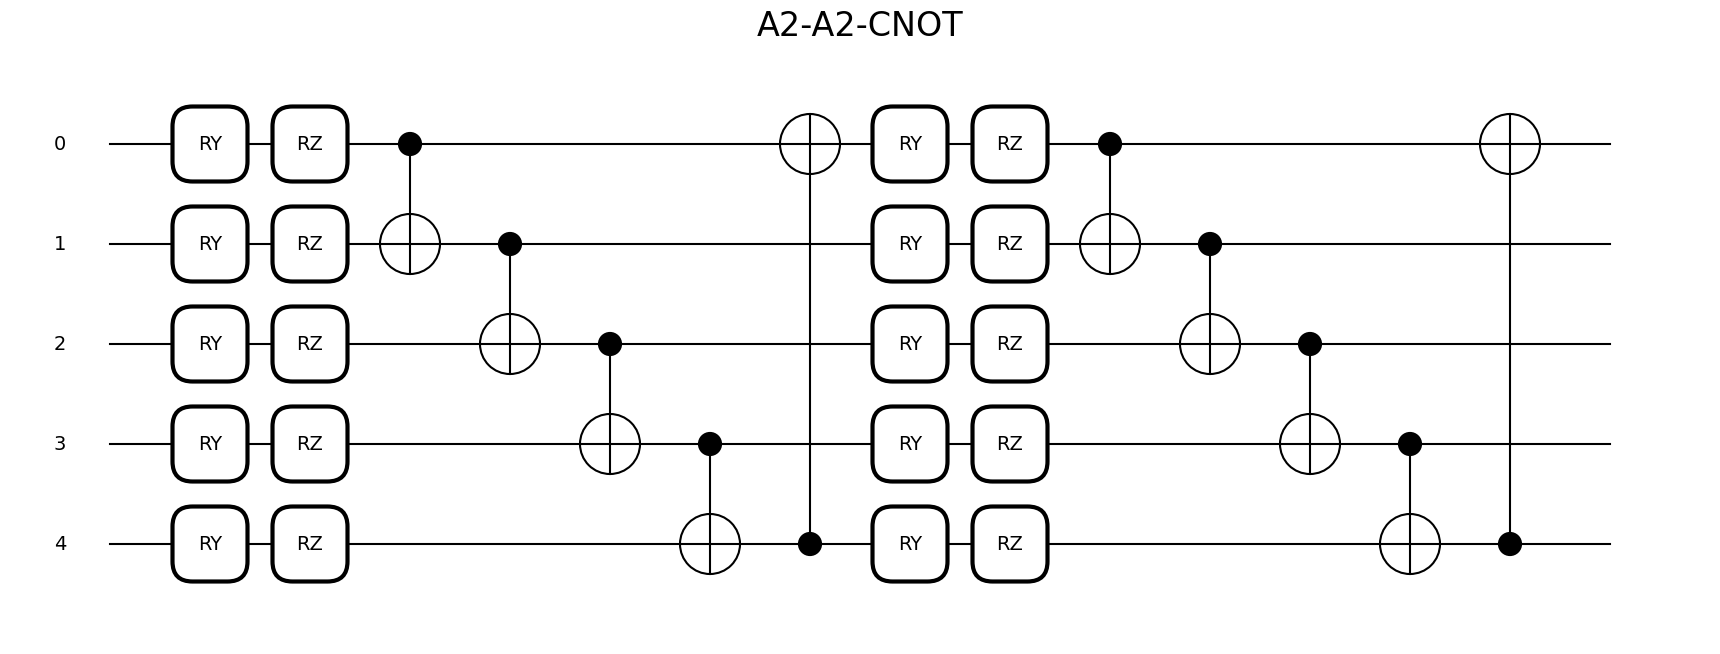

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


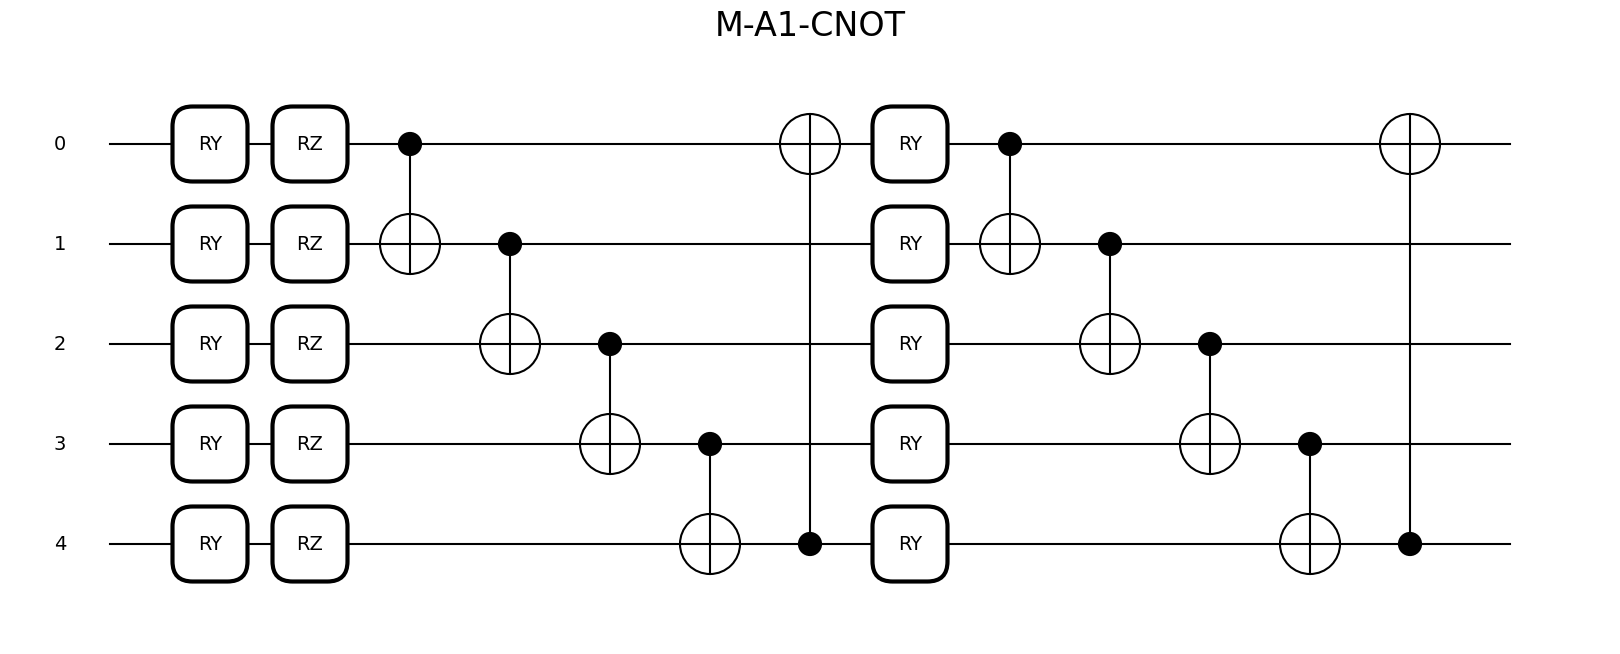

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


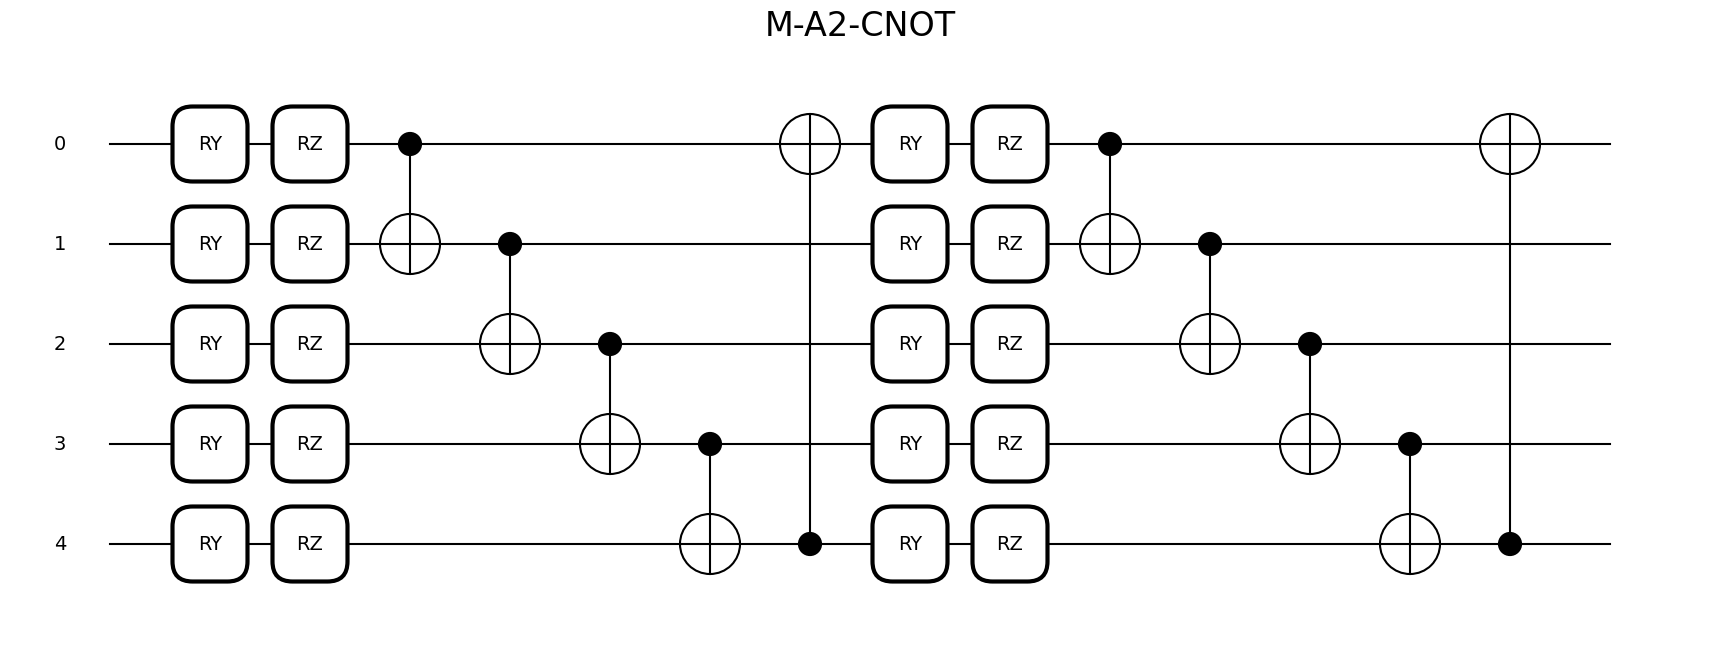

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


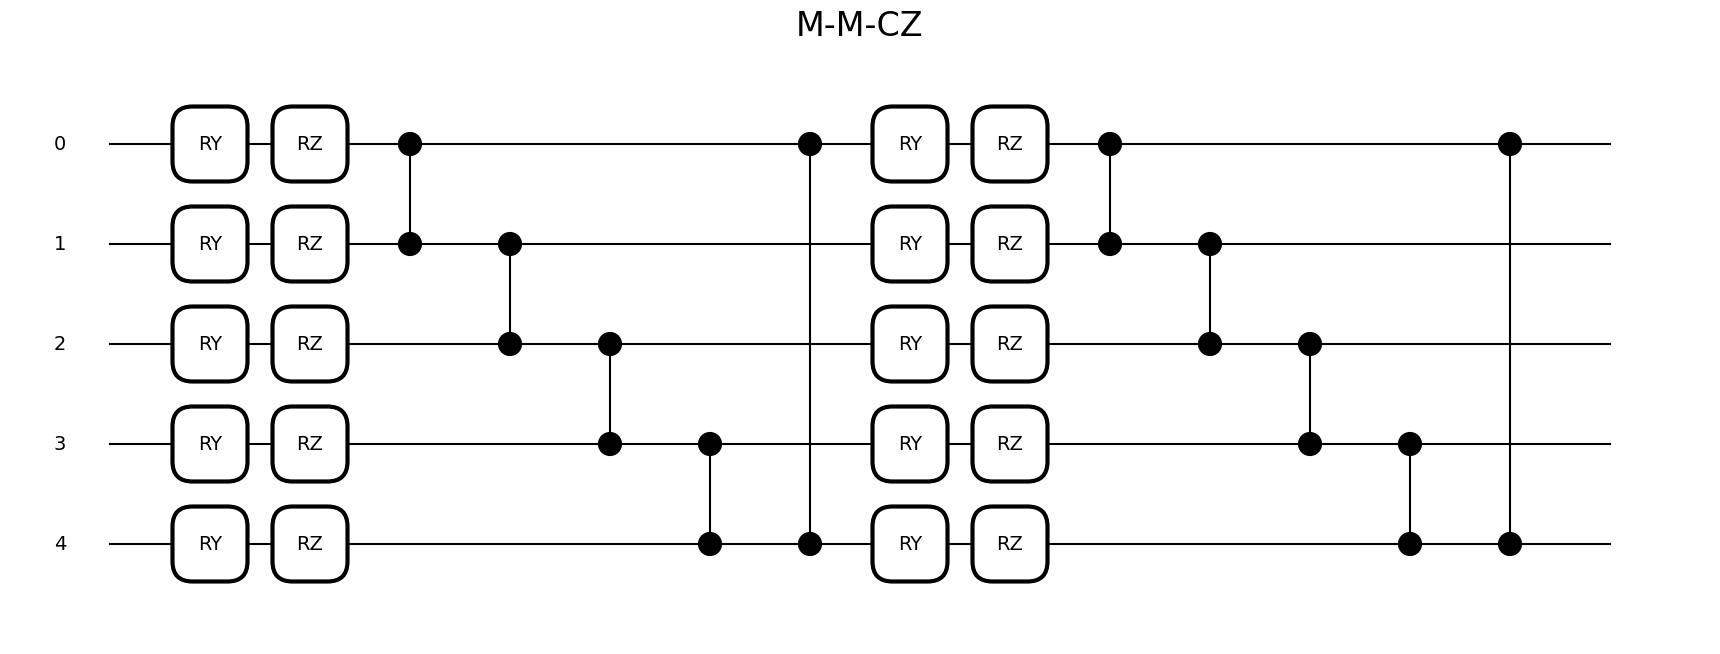

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


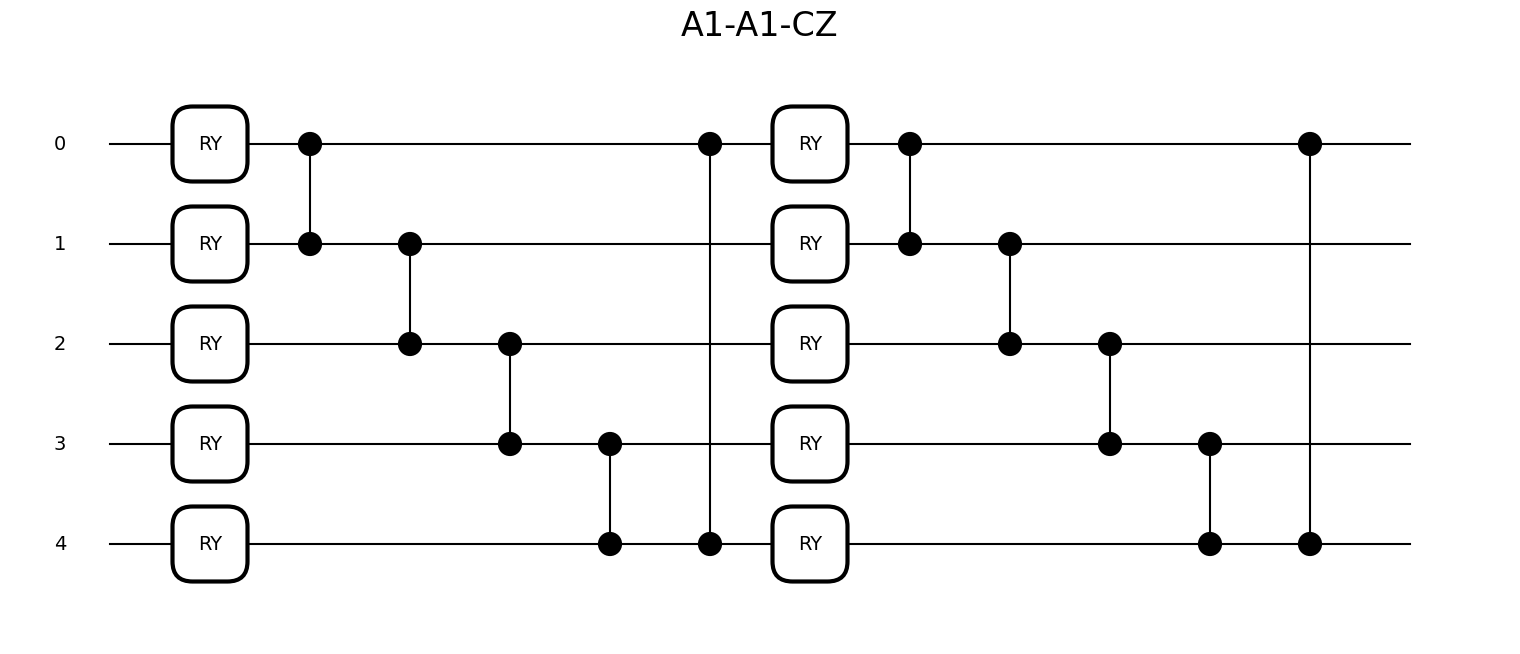

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


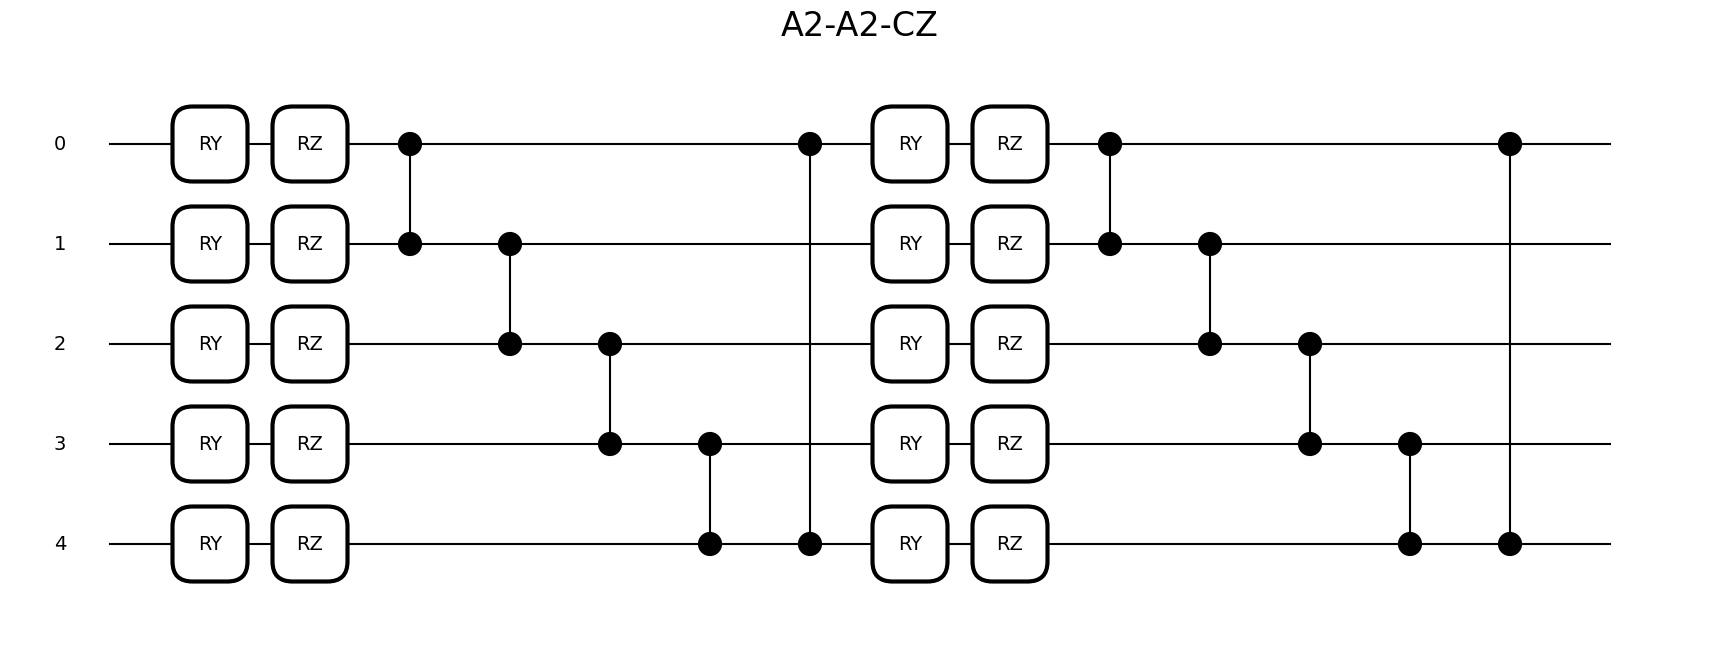

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


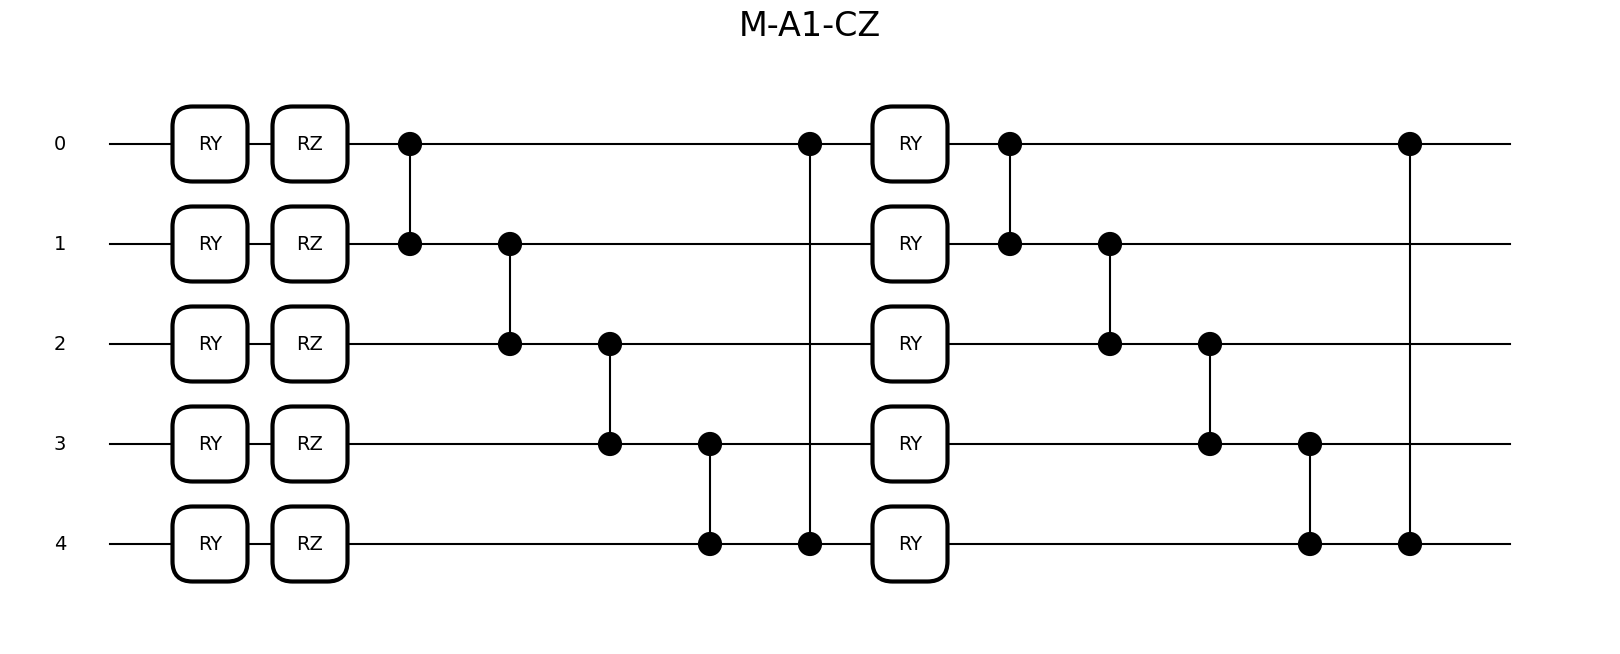

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_19860/1998535807.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


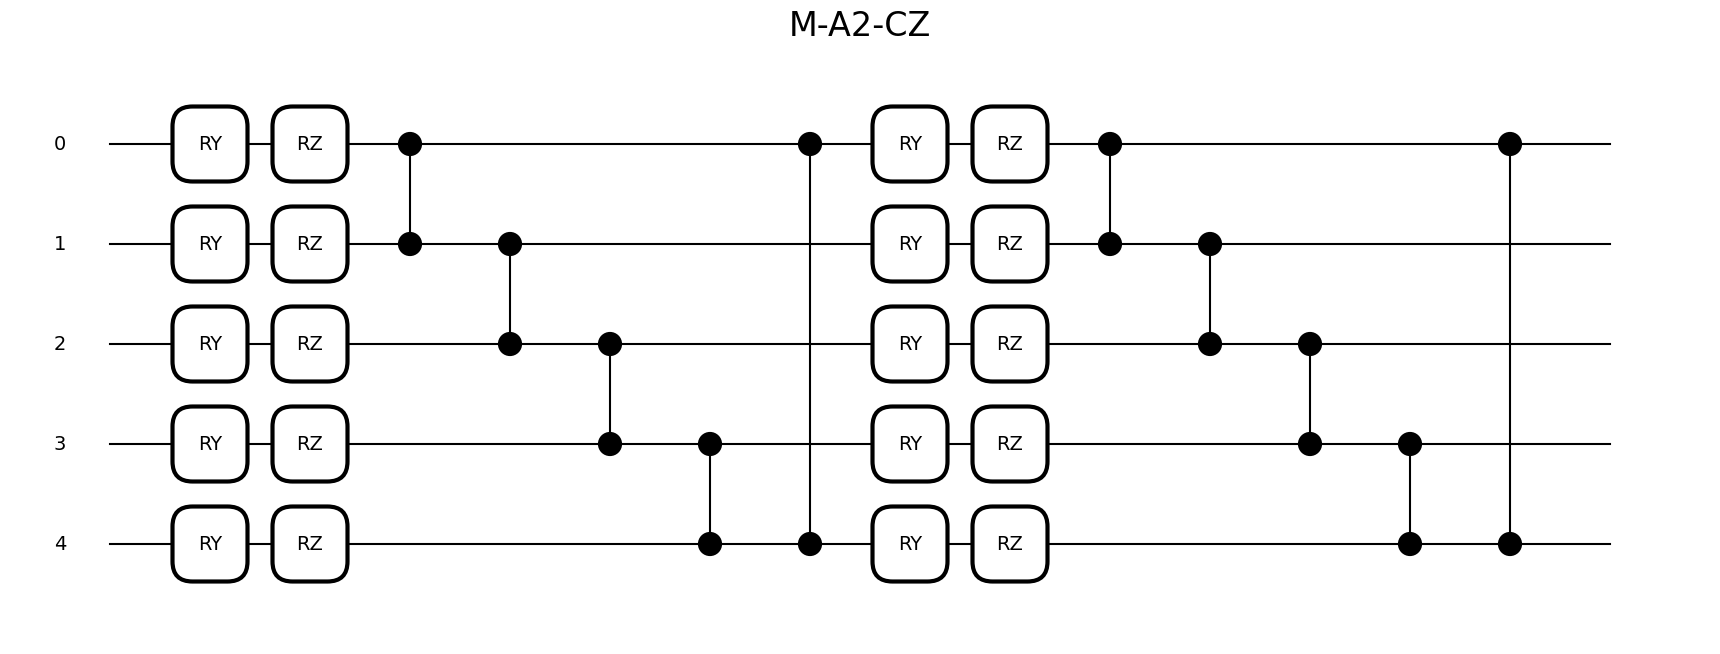

In [11]:
for k,v in ENCODER_LIST.items():

    draw_encoder = qml.draw_mpl(qml.QNode(v,device),level=3)
    draw_encoder(np.random.rand(5), range(5))
    plt.title(k,fontsize=24)
    plt.tight_layout()
    plt.savefig(os.path.join(os.path.expanduser('~'),'qregress/images/encoders/',f"5_qubit_encoder_{k}.png"),dpi=300,bbox_inches='tight')
    plt.show()